In [195]:
import pandas as pd
import numpy as np
from scipy.stats import poisson 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import confusion_matrix as cm

In [3]:
def league_matches(x):
    dfList = []
    for i in range(5, 21):
        df=pd.read_csv("http://www.football-data.co.uk/mmz4281/{0:02d}{1:02d}".format(i,i+1)+f"/{x}.csv",error_bad_lines=False,encoding='latin1')
        
        df = df[['Date','HomeTeam','AwayTeam','FTHG','FTAG','FTR','HS', 'AS','B365H', 'B365D', 'B365A']]
        dfList.append(df)
        Data = dfList[0].append(dfList[1:])
    return Data

      

In [4]:
%%time
Bundesliga=league_matches('D1')
EPL=league_matches('E0')
LaLiga=league_matches('SP1')
SerieA=league_matches('I1')

CPU times: user 1.64 s, sys: 325 ms, total: 1.97 s
Wall time: 1min 10s


In [11]:
Bundesliga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,05/08/05,Bayern Munich,M'gladbach,3,0,H,19,10,1.30,5.00,9.50
1,06/08/05,Duisburg,Stuttgart,1,1,D,11,11,2.75,3.25,2.25
2,06/08/05,FC Koln,Mainz,1,0,H,14,19,2.10,3.25,3.00
3,06/08/05,Hamburg,Nurnberg,3,0,H,12,17,1.57,3.40,5.50
4,06/08/05,Hannover,Hertha,2,2,D,12,15,2.40,3.20,2.60
...,...,...,...,...,...,...,...,...,...,...,...
13,26/09/2020,Mainz,Stuttgart,1,4,A,11,15,2.37,3.50,2.90
14,26/09/2020,M'gladbach,Union Berlin,1,1,D,14,15,1.44,4.50,7.50
15,26/09/2020,Schalke 04,Werder Bremen,1,3,A,17,17,2.50,3.40,2.80
16,27/09/2020,Hoffenheim,Bayern Munich,4,1,H,17,14,11.00,7.50,1.20


In [12]:
EPL

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,13/08/05,Aston Villa,Bolton,2.0,2.0,D,3.0,13.0,2.30,3.25,3.00
1,13/08/05,Everton,Man United,0.0,2.0,A,10.0,12.0,5.00,3.40,1.72
2,13/08/05,Fulham,Birmingham,0.0,0.0,D,15.0,7.0,2.37,3.25,2.87
3,13/08/05,Man City,West Brom,0.0,0.0,D,15.0,13.0,1.72,3.40,5.00
4,13/08/05,Middlesbrough,Liverpool,0.0,0.0,D,4.0,16.0,2.87,3.20,2.40
...,...,...,...,...,...,...,...,...,...,...,...
23,27/09/2020,Tottenham,Newcastle,1.0,1.0,D,23.0,6.0,1.45,4.50,7.00
24,27/09/2020,Man City,Leicester,2.0,5.0,A,16.0,7.0,1.28,6.00,9.50
25,27/09/2020,West Ham,Wolves,4.0,0.0,H,15.0,11.0,3.60,3.50,2.05
26,28/09/2020,Fulham,Aston Villa,0.0,3.0,A,16.0,12.0,2.90,3.25,2.50


In [13]:
LaLiga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,27/08/05,Alaves,Barcelona,0,0,D,5,17,7.00,3.75,1.50
1,27/08/05,Ath Bilbao,Sociedad,3,0,H,10,9,2.00,3.25,3.25
2,27/08/05,Valencia,Betis,1,0,H,9,14,2.00,3.25,3.25
3,28/08/05,Ath Madrid,Zaragoza,0,0,D,16,9,1.72,3.40,4.00
4,28/08/05,Cadiz,Real Madrid,1,2,A,15,17,7.50,4.00,1.44
...,...,...,...,...,...,...,...,...,...,...,...
19,27/09/2020,Eibar,Ath Bilbao,1,2,A,7,9,3.00,3.00,2.55
20,27/09/2020,Ath Madrid,Granada,6,1,H,17,11,1.50,4.00,7.50
21,27/09/2020,Cadiz,Sevilla,1,3,A,12,14,5.00,3.60,1.70
22,27/09/2020,Valladolid,Celta,1,1,D,10,5,2.80,3.00,2.70


In [14]:
EPL.isnull().sum()

Date        1
HomeTeam    1
AwayTeam    1
FTHG        1
FTAG        1
FTR         1
HS          1
AS          1
B365H       1
B365D       1
B365A       1
dtype: int64

In [15]:
EPL_isna = EPL[EPL.isna().any(axis=1)]

In [16]:
EPL_isna

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
380,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
EPL=EPL.dropna()

In [18]:
SerieA_isna = SerieA[SerieA.isna().any(axis=1)]

In [19]:
SerieA_isna

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
85,26/10/05,Lazio,Chievo,2.0,2.0,D,NaN,NaN,2.00,3.00,4.00
132,04/12/05,Fiorentina,Juventus,1.0,2.0,A,NaN,NaN,2.87,3.00,2.30
133,04/12/05,Lazio,Siena,3.0,2.0,H,NaN,NaN,1.80,3.00,4.33
134,04/12/05,Lecce,Roma,2.0,2.0,D,NaN,NaN,3.25,3.00,2.10
135,04/12/05,Palermo,Cagliari,2.0,2.0,D,NaN,NaN,1.61,3.25,5.50
136,04/12/05,Reggina,Parma,2.0,1.0,H,NaN,NaN,1.90,3.00,3.80
137,04/12/05,Sampdoria,Empoli,2.0,0.0,H,NaN,NaN,1.66,3.20,5.00
138,04/12/05,Treviso,Messina,0.0,0.0,D,NaN,NaN,2.40,2.75,3.00
139,04/12/05,Udinese,Livorno,0.0,2.0,A,NaN,NaN,1.80,3.00,4.33
140,10/12/05,Fiorentina,Treviso,1.0,0.0,H,NaN,NaN,1.28,5.00,10.00


In [20]:
SerieA.dropna(axis = 0, how = 'all', inplace = True)
SerieA

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A
0,27/08/05,Fiorentina,Sampdoria,2.0,1.0,H,15.0,9.0,2.20,2.87,3.25
1,27/08/05,Livorno,Lecce,2.0,1.0,H,17.0,6.0,1.90,2.90,4.00
2,28/08/05,Ascoli,Milan,1.0,1.0,D,8.0,16.0,7.50,3.75,1.40
3,28/08/05,Inter,Treviso,3.0,0.0,H,16.0,7.0,1.16,5.50,13.00
4,28/08/05,Juventus,Chievo,1.0,0.0,H,16.0,2.0,1.25,5.00,13.00
...,...,...,...,...,...,...,...,...,...,...,...
12,27/09/2020,Napoli,Genoa,6.0,0.0,H,18.0,3.0,1.30,5.50,10.00
13,27/09/2020,Verona,Udinese,1.0,0.0,H,8.0,14.0,2.70,3.00,2.80
14,27/09/2020,Crotone,Milan,0.0,2.0,A,5.0,11.0,6.00,4.50,1.50
15,27/09/2020,Roma,Juventus,2.0,2.0,D,7.0,6.0,3.60,3.60,2.00


In [21]:
#There´s different date formats, so let´s homogenize them, to convert them to datetime type
def date_correction(y):
    x=y.split('/')
    if len(x[-1])==2:
        aux='20'+x[-1]
        x.pop(-1)
        x.append(aux)
    else:
        pass
    return ('/'.join(x))


In [23]:
Bundesliga['Date']=Bundesliga['Date'].apply(date_correction)
EPL['Date']=EPL['Date'].apply(date_correction)
LaLiga['Date']=LaLiga['Date'].apply(date_correction)
SerieA['Date']=SerieA['Date'].apply(date_correction)

In [24]:
##adding season column to the df
%pprint
lst=[]
for i in range(5, 21):
    a="{0:02d}{1:02d}".format(i,i+1)
    lst.append(a)
    
lst
lst=sorted(lst*380) #This list works for leagues that has 20 teams, and 380 games per season
lst=['20'+x for x in lst]

lst_bundes=[]
for i in range(5, 21):
    a="{0:02d}{1:02d}".format(i,i+1)
    lst_bundes.append(a)
    
lst_bundes=sorted(lst_bundes*306) #This list works Bundesliga that has 18 teams, and 306 games per season
lst_bundes=['20'+x for x in lst_bundes]



Pretty printing has been turned OFF


In [25]:
def add_season(league):
    a=len(lst)-len(league['Date'])
    ##to fit the dataframe knowing the difference of the length of the list and the rows
    lista=lst[:-a]
    league['season']=lista
    
    return league

In [26]:
add_season(LaLiga)
LaLiga


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,27/08/2005,Alaves,Barcelona,0,0,D,5,17,7.00,3.75,1.50,200506
1,27/08/2005,Ath Bilbao,Sociedad,3,0,H,10,9,2.00,3.25,3.25,200506
2,27/08/2005,Valencia,Betis,1,0,H,9,14,2.00,3.25,3.25,200506
3,28/08/2005,Ath Madrid,Zaragoza,0,0,D,16,9,1.72,3.40,4.00,200506
4,28/08/2005,Cadiz,Real Madrid,1,2,A,15,17,7.50,4.00,1.44,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
19,27/09/2020,Eibar,Ath Bilbao,1,2,A,7,9,3.00,3.00,2.55,202021
20,27/09/2020,Ath Madrid,Granada,6,1,H,17,11,1.50,4.00,7.50,202021
21,27/09/2020,Cadiz,Sevilla,1,3,A,12,14,5.00,3.60,1.70,202021
22,27/09/2020,Valladolid,Celta,1,1,D,10,5,2.80,3.00,2.70,202021


In [27]:
add_season(EPL)
EPL

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,13/08/2005,Aston Villa,Bolton,2.0,2.0,D,3.0,13.0,2.30,3.25,3.00,200506
1,13/08/2005,Everton,Man United,0.0,2.0,A,10.0,12.0,5.00,3.40,1.72,200506
2,13/08/2005,Fulham,Birmingham,0.0,0.0,D,15.0,7.0,2.37,3.25,2.87,200506
3,13/08/2005,Man City,West Brom,0.0,0.0,D,15.0,13.0,1.72,3.40,5.00,200506
4,13/08/2005,Middlesbrough,Liverpool,0.0,0.0,D,4.0,16.0,2.87,3.20,2.40,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
23,27/09/2020,Tottenham,Newcastle,1.0,1.0,D,23.0,6.0,1.45,4.50,7.00,202021
24,27/09/2020,Man City,Leicester,2.0,5.0,A,16.0,7.0,1.28,6.00,9.50,202021
25,27/09/2020,West Ham,Wolves,4.0,0.0,H,15.0,11.0,3.60,3.50,2.05,202021
26,28/09/2020,Fulham,Aston Villa,0.0,3.0,A,16.0,12.0,2.90,3.25,2.50,202021


In [28]:
add_season(SerieA)
SerieA

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,27/08/2005,Fiorentina,Sampdoria,2.0,1.0,H,15.0,9.0,2.20,2.87,3.25,200506
1,27/08/2005,Livorno,Lecce,2.0,1.0,H,17.0,6.0,1.90,2.90,4.00,200506
2,28/08/2005,Ascoli,Milan,1.0,1.0,D,8.0,16.0,7.50,3.75,1.40,200506
3,28/08/2005,Inter,Treviso,3.0,0.0,H,16.0,7.0,1.16,5.50,13.00,200506
4,28/08/2005,Juventus,Chievo,1.0,0.0,H,16.0,2.0,1.25,5.00,13.00,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
12,27/09/2020,Napoli,Genoa,6.0,0.0,H,18.0,3.0,1.30,5.50,10.00,202021
13,27/09/2020,Verona,Udinese,1.0,0.0,H,8.0,14.0,2.70,3.00,2.80,202021
14,27/09/2020,Crotone,Milan,0.0,2.0,A,5.0,11.0,6.00,4.50,1.50,202021
15,27/09/2020,Roma,Juventus,2.0,2.0,D,7.0,6.0,3.60,3.60,2.00,202021


In [29]:
b=len(lst_bundes)-len(Bundesliga['Date'])
lista_b=lst_bundes[:-b]
Bundesliga['season']=lista_b

In [30]:
Bundesliga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,05/08/2005,Bayern Munich,M'gladbach,3,0,H,19,10,1.30,5.00,9.50,200506
1,06/08/2005,Duisburg,Stuttgart,1,1,D,11,11,2.75,3.25,2.25,200506
2,06/08/2005,FC Koln,Mainz,1,0,H,14,19,2.10,3.25,3.00,200506
3,06/08/2005,Hamburg,Nurnberg,3,0,H,12,17,1.57,3.40,5.50,200506
4,06/08/2005,Hannover,Hertha,2,2,D,12,15,2.40,3.20,2.60,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
13,26/09/2020,Mainz,Stuttgart,1,4,A,11,15,2.37,3.50,2.90,202021
14,26/09/2020,M'gladbach,Union Berlin,1,1,D,14,15,1.44,4.50,7.50,202021
15,26/09/2020,Schalke 04,Werder Bremen,1,3,A,17,17,2.50,3.40,2.80,202021
16,27/09/2020,Hoffenheim,Bayern Munich,4,1,H,17,14,11.00,7.50,1.20,202021


# Shots and Goals Analysis

Let´s find out how many shots go up in the final score, in other words the shot efficency.

In [31]:
def shots(league):
    league_shots=league.copy()
    league_shots.drop(['B365H','B365D','B365A'],axis=1,inplace=True)
    league_shots['HomeConversion'] = league_shots.apply(lambda row: round((row.FTHG/row.HS)*100,2) if row.HS !=0 else 0, axis=1)
    league_shots['AwayConversion'] = league_shots.apply(lambda row: round((row.FTAG/row.AS)*100,2) if row.AS !=0 else 0, axis=1)
    home_shots=league_shots.groupby(['HomeTeam'])['HS'].mean()
    home_shots.sort_values(axis=0, ascending=False, inplace=True)
    away_shots=league_shots.groupby(['AwayTeam'])['AS'].mean()
    away_shots.sort_values(axis=0, ascending=False, inplace=True)
    home_conversion= league_shots.groupby(['HomeTeam'])['HomeConversion'].mean()
    home_conversion.sort_values(axis=0, ascending=False, inplace=True)
    away_conversion= league_shots.groupby(['AwayTeam'])['AwayConversion'].mean()
    away_conversion.sort_values(axis=0, ascending=False, inplace=True)
    
    fig,axes = plt.subplots(figsize = (15,15),nrows = 2, ncols = 2)
    plt.sca(axes[0][0])
    home_shots[:10].plot(kind = 'bar',color='red',alpha = 0.5)
    plt.ylabel('Average Shots')
    plt.title('Home Shots (2005/06 to 2020/21)')

    plt.sca(axes[0][1])
    away_shots[:10].plot(kind = 'bar',alpha = 0.5,color='blue')
    plt.ylabel('Average Shots')
    plt.title('Away Shots (2005/06 to 2020/21)')
    
    plt.sca(axes[1][0])
    home_conversion[:10].plot(kind='bar',color='yellow',alpha = 0.5)
    plt.ylabel('Conversion Percentage')
    plt.title('Home Conversion (2005/06 to 2020/21)')
    
    plt.sca(axes[1][1])
    away_conversion[:10].plot(kind='bar',color='green',alpha = 0.5)
    plt.ylabel('Conversion Percentage')
    plt.title('Away Conversion (2005/06 to 2020/21)') 
    
    fig.tight_layout(pad=1)
    
    plt.savefig('Shots_analysis.png',bbox_inches='tight')
    return fig,axes
    

(<Figure size 1080x1080 with 4 Axes>, array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129141af0>,
      dtype=object))

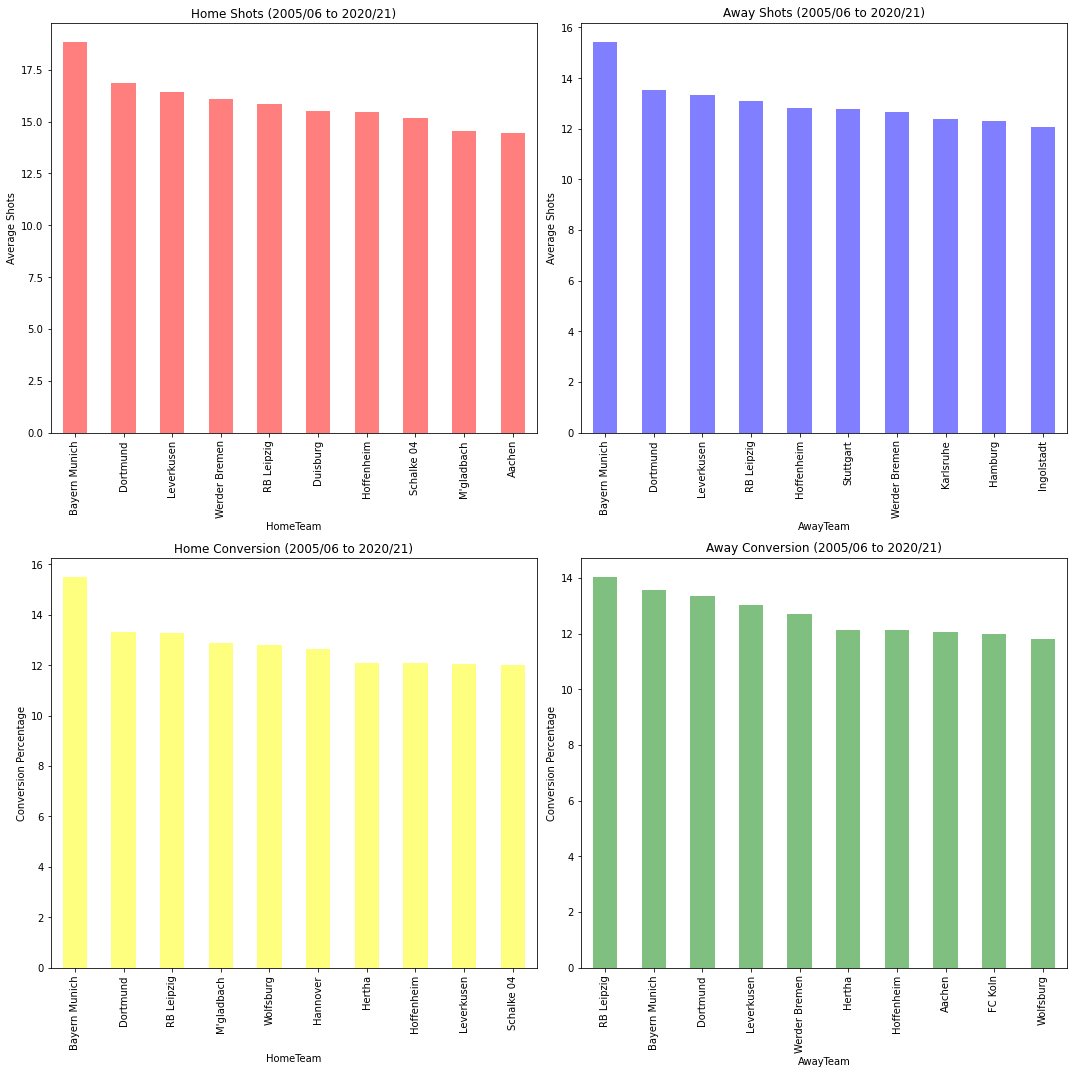

In [32]:
shots(Bundesliga)

(<Figure size 1080x1080 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136f71ee0>,
       dtype=object))

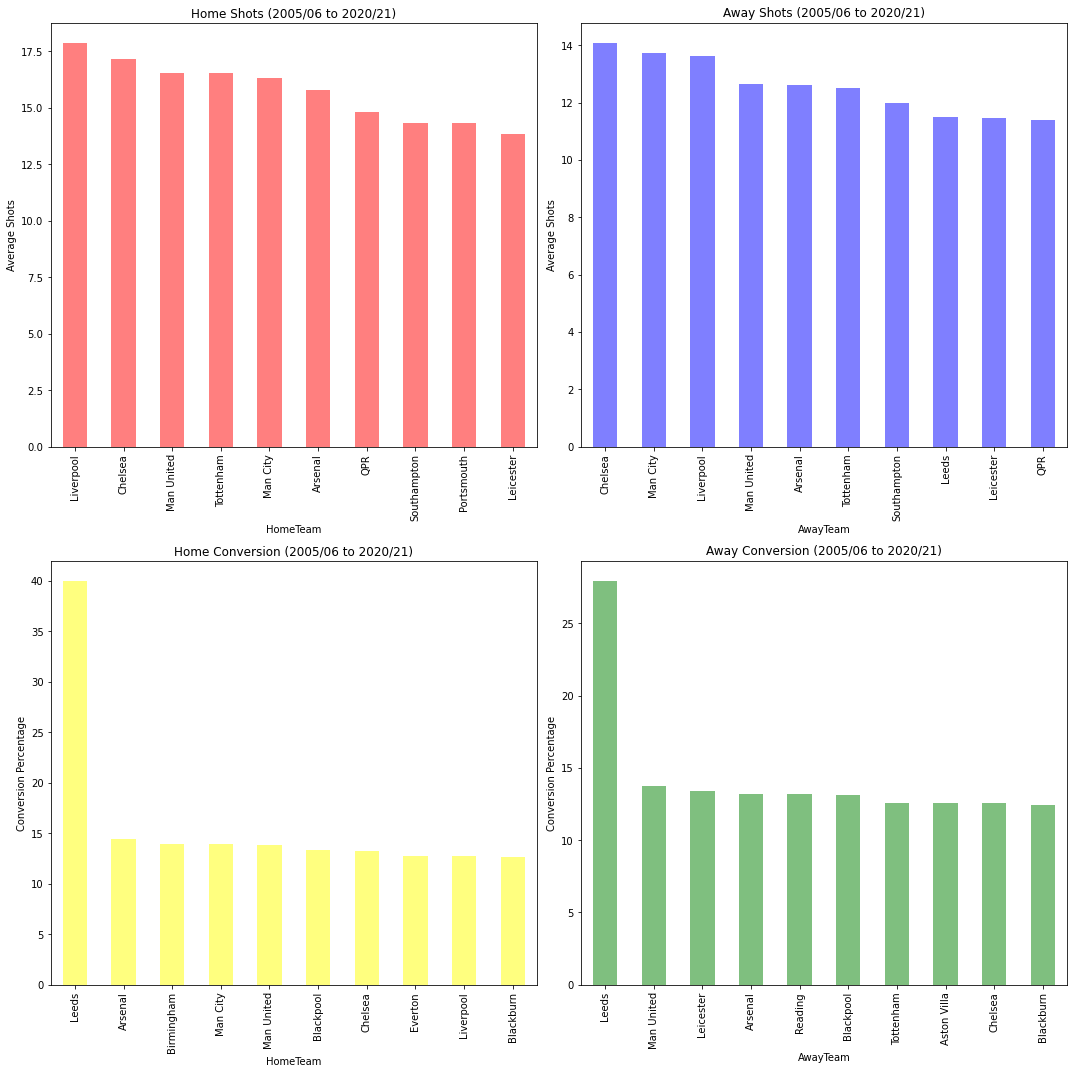

In [328]:
shots(EPL)

(<Figure size 1080x1080 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x137e58880>,
       dtype=object))

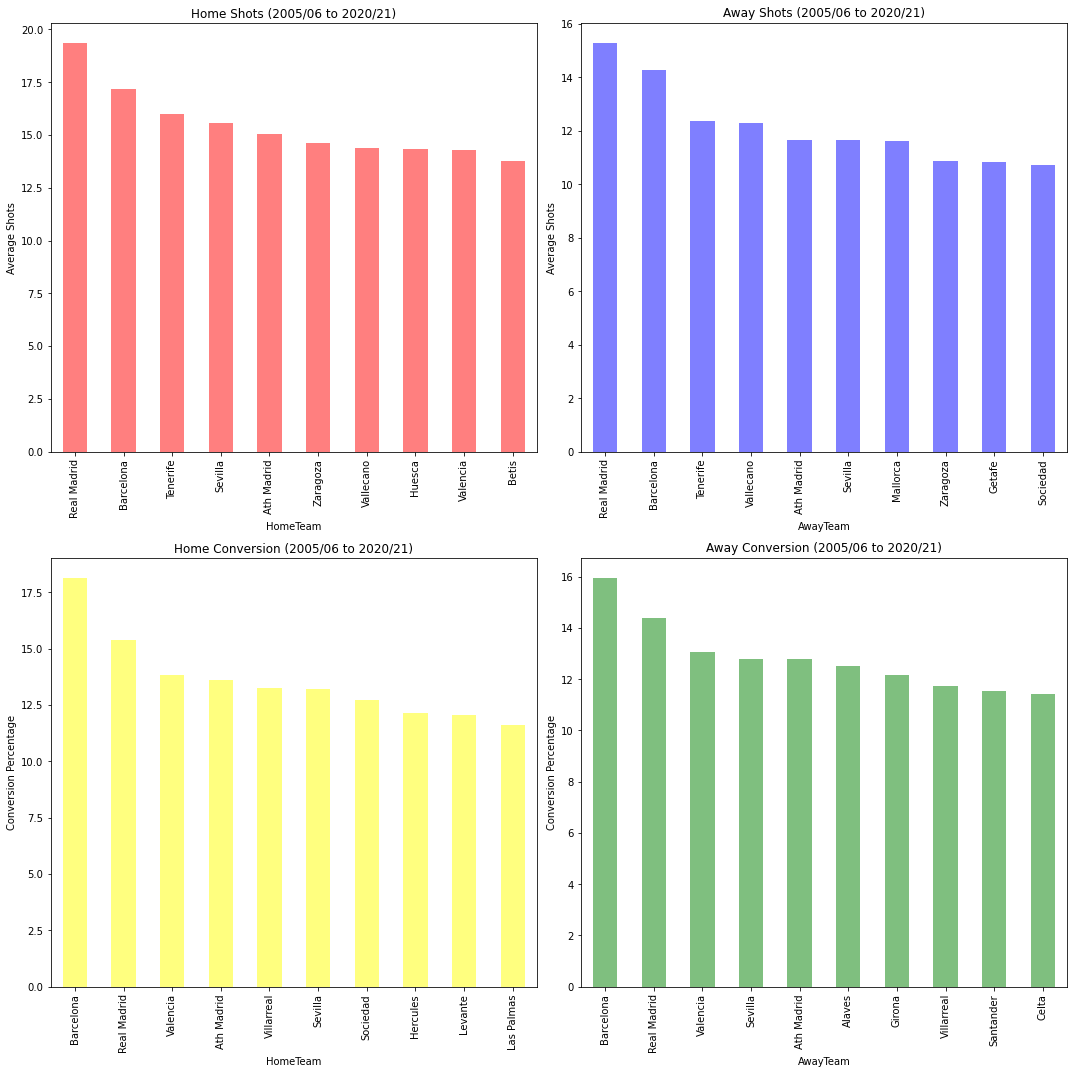

In [329]:
shots(LaLiga)

(<Figure size 1080x1080 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x138955bb0>,
       dtype=object))

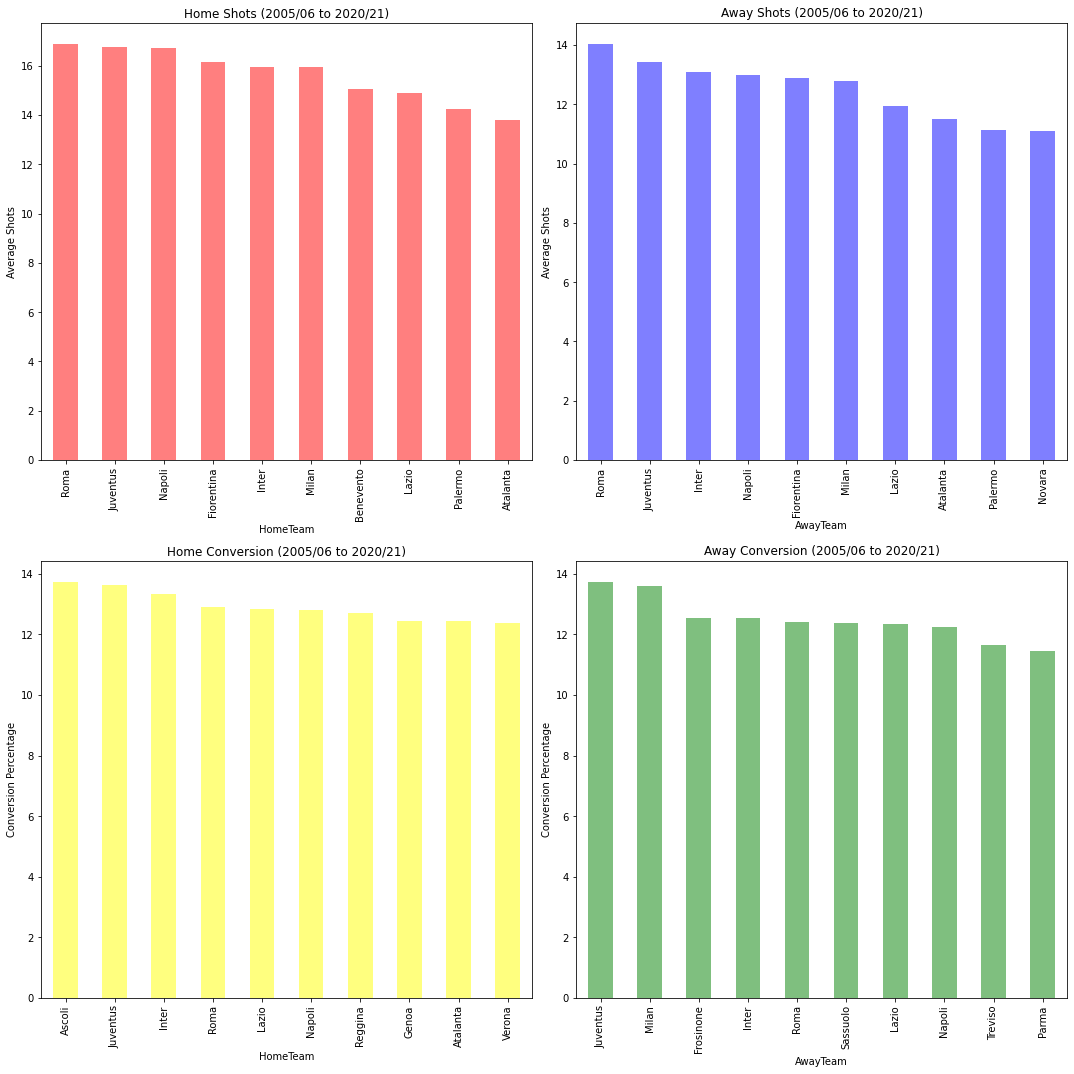

In [330]:
shots(SerieA)

In [321]:
def goals(league):
    goals=league.copy()
    home_goals=goals.groupby(['HomeTeam'])['FTHG'].sum()
    home_goals.sort_values(axis=0, ascending=False, inplace=True)
    away_goals=goals.groupby(['AwayTeam'])['FTAG'].sum()
    away_goals.sort_values(axis=0, ascending=False, inplace=True)
    total_goals=home_goals+away_goals
    total_goals.sort_values(axis=0, ascending=True, inplace=True)
    home_mean=goals.groupby(['HomeTeam'])['FTHG'].mean()
    home_mean.sort_values(axis=0, ascending=False, inplace=True)
    away_mean=goals.groupby(['AwayTeam'])['FTAG'].mean()
    away_mean.sort_values(axis=0, ascending=False, inplace=True)
    total_mean=(home_mean+away_mean)/2
    total_mean.sort_values(axis=0, ascending=True, inplace=True)
    
    fig,axes = plt.subplots(figsize = (15,15),nrows = 2, ncols = 3)
    plt.sca(axes[0][0])
    home_goals[:10].plot(kind = 'bar',color='red',alpha = 0.5)
    plt.ylabel('Goals')
    plt.title('Home Goals (2005/06 to 2020/21)')

    plt.sca(axes[0][1])
    away_goals[:10].plot(kind = 'bar',alpha = 0.5,color='yellow')
    plt.ylabel('Goals')
    plt.title('Away Goals (2005/06 to 2020/21)')
    
    plt.sca(axes[0][2])
    total_goals.plot(kind = 'barh',color='blue')
    plt.ylabel('Goals')
    plt.title('All-teams Goals (2005/06 to 2020/21)')
    
    plt.sca(axes[1][0])
    home_mean[:10].plot(kind = 'bar',color='orange',alpha = 0.5)
    plt.ylabel('Goal Average')
    plt.title('Goal Average per Game (2005/06 to 2020/21)')

    plt.sca(axes[1][1])
    away_mean[:10].plot(kind = 'bar',alpha = 0.5,color='brown')
    plt.ylabel('Goal Average')
    plt.title('Goal Average per Game (2005/06 to 2020/21)')
    
    plt.sca(axes[1][2])
    total_mean.plot(kind = 'barh',color='blue')
    plt.ylabel('Goals')
    plt.title('All-teams Average per Game (2005/06 to 2020/21)')
    
    fig.tight_layout(pad=1)
    return fig,axes
    
    
    
    

(<Figure size 1080x1080 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134d98bb0>,
       dtype=object))

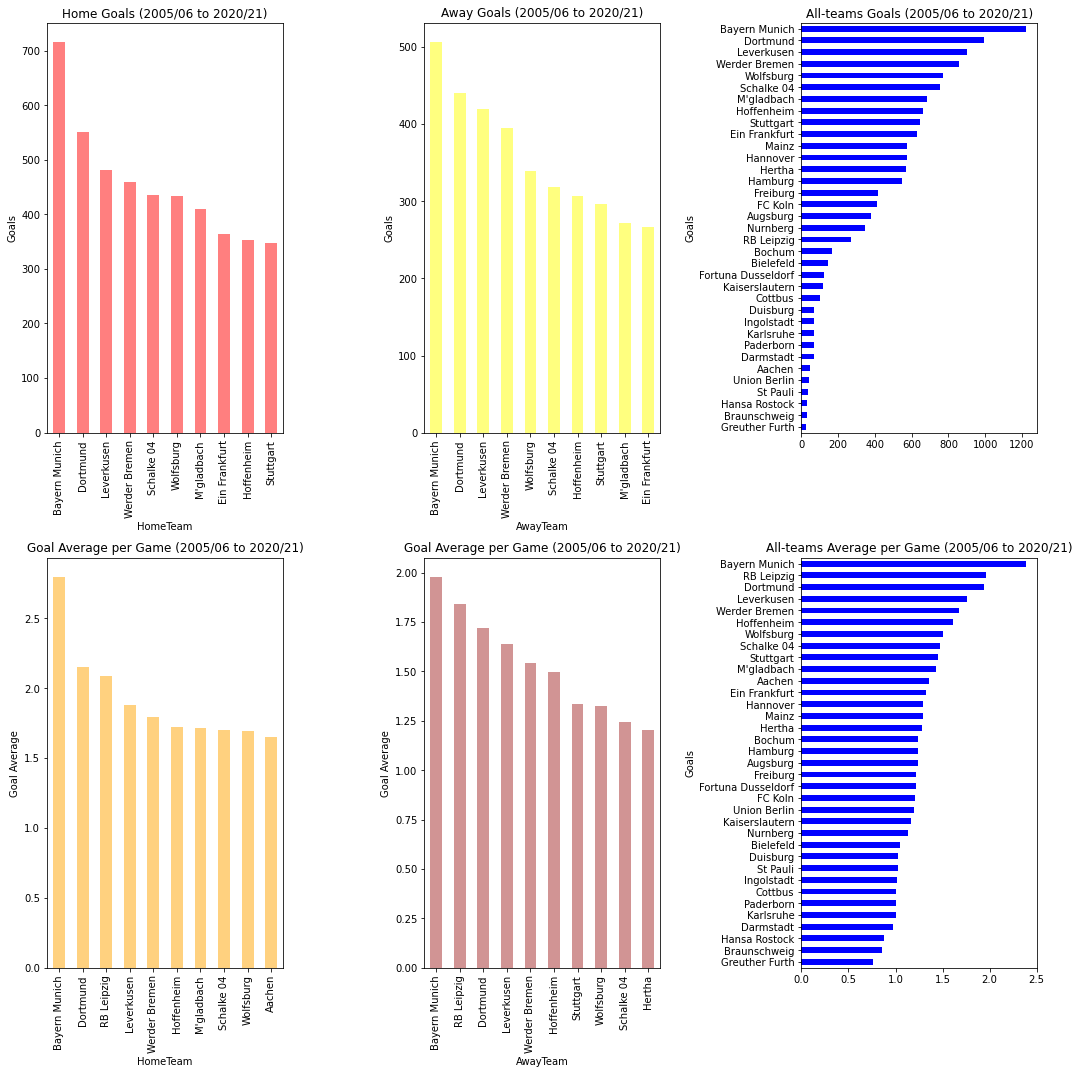

In [322]:
goals(Bundesliga)

(<Figure size 1080x1080 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134d6c370>,
       dtype=object))

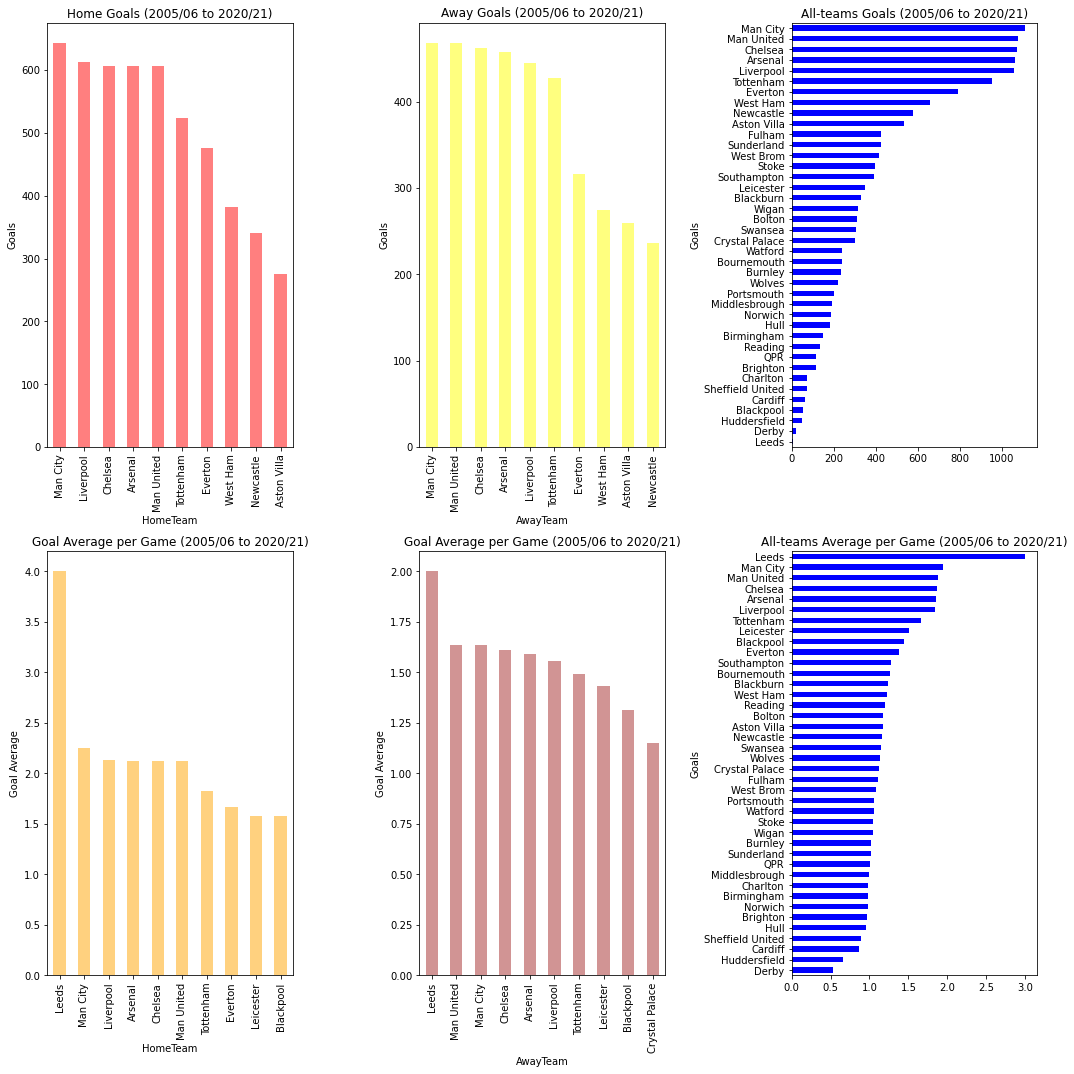

In [323]:
goals(EPL)

(<Figure size 1080x1080 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13543c5e0>,
       dtype=object))

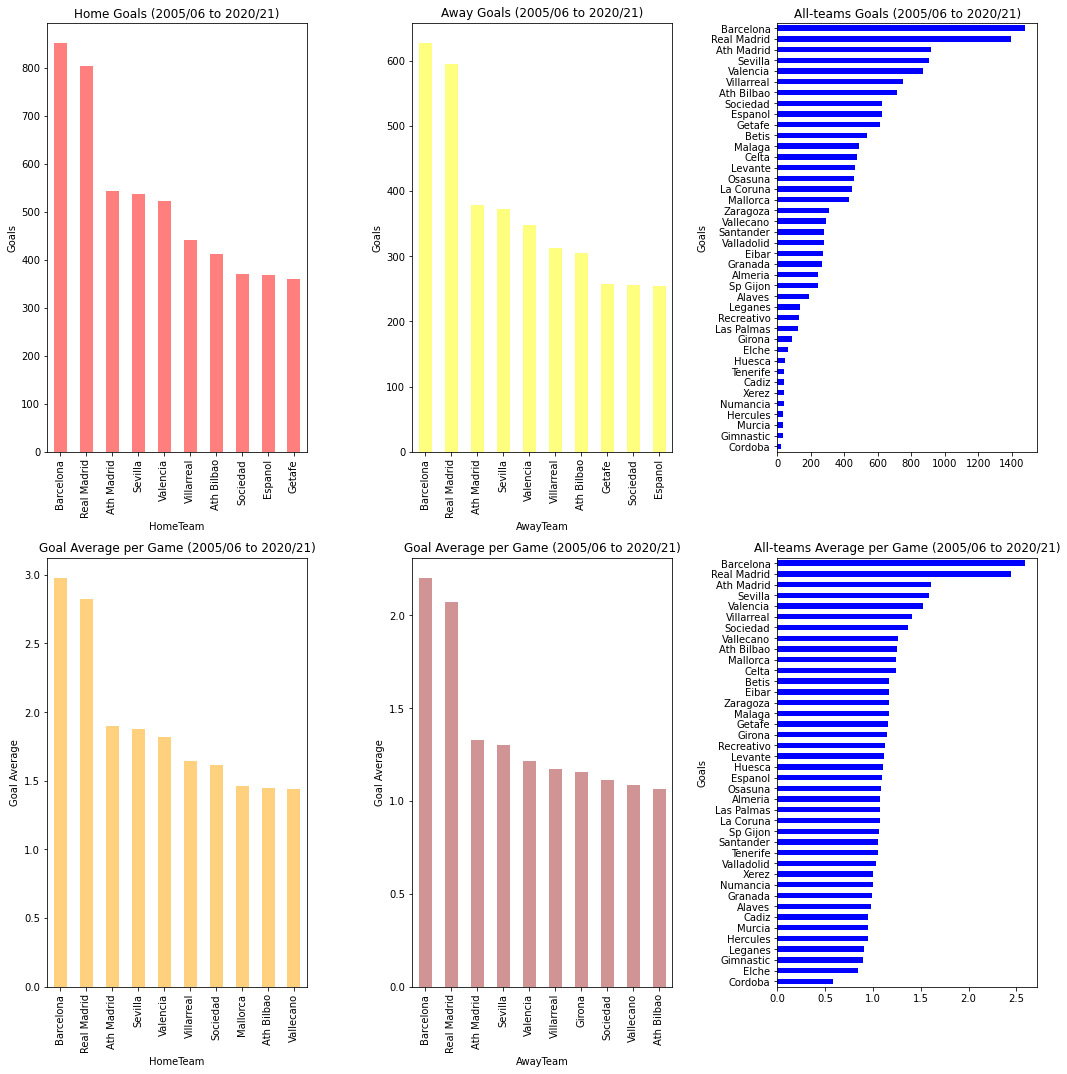

In [324]:
goals(LaLiga)

(<Figure size 1080x1080 with 6 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13575fcd0>,
       dtype=object))

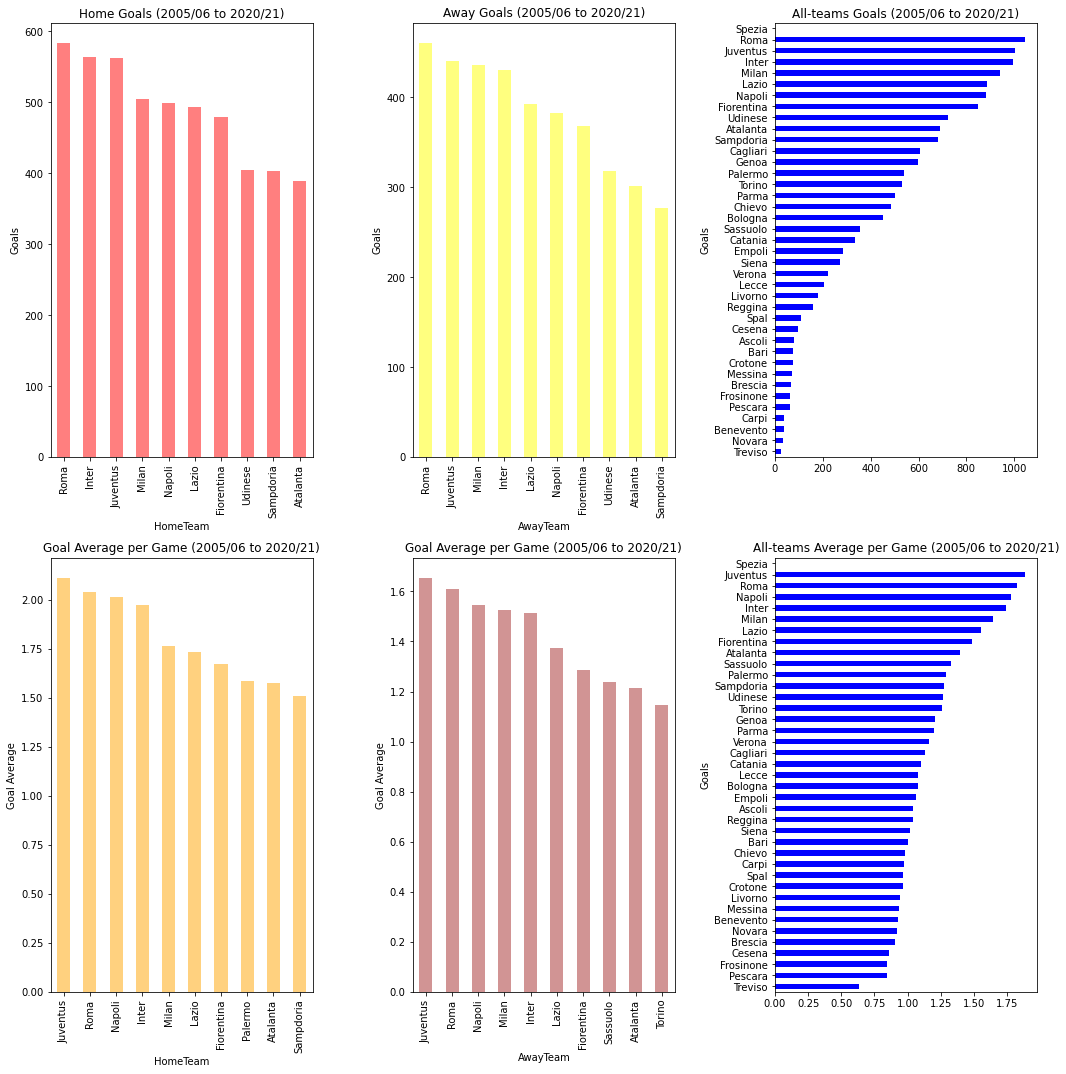

In [325]:
goals(SerieA)

In [38]:
%%time
total_df=pd.concat([Bundesliga,EPL,LaLiga,SerieA],axis=0)

CPU times: user 10.8 ms, sys: 2.44 ms, total: 13.3 ms
Wall time: 11.2 ms


In [44]:
total_df

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season
0,05/08/2005,Bayern Munich,M'gladbach,3.0,0.0,H,19.0,10.0,1.30,5.00,9.50,200506
1,06/08/2005,Duisburg,Stuttgart,1.0,1.0,D,11.0,11.0,2.75,3.25,2.25,200506
2,06/08/2005,FC Koln,Mainz,1.0,0.0,H,14.0,19.0,2.10,3.25,3.00,200506
3,06/08/2005,Hamburg,Nurnberg,3.0,0.0,H,12.0,17.0,1.57,3.40,5.50,200506
4,06/08/2005,Hannover,Hertha,2.0,2.0,D,12.0,15.0,2.40,3.20,2.60,200506
...,...,...,...,...,...,...,...,...,...,...,...,...
12,27/09/2020,Napoli,Genoa,6.0,0.0,H,18.0,3.0,1.30,5.50,10.00,202021
13,27/09/2020,Verona,Udinese,1.0,0.0,H,8.0,14.0,2.70,3.00,2.80,202021
14,27/09/2020,Crotone,Milan,0.0,2.0,A,5.0,11.0,6.00,4.50,1.50,202021
15,27/09/2020,Roma,Juventus,2.0,2.0,D,7.0,6.0,3.60,3.60,2.00,202021


In [69]:
total0506=total_df[total_df['season']=='200506']
total0607=total_df[total_df['season']=='200607']
total0708=total_df[total_df['season']=='200708']
total0809=total_df[total_df['season']=='200809']
total0910=total_df[total_df['season']=='200910']
total1011=total_df[total_df['season']=='201011']
total1112=total_df[total_df['season']=='201112']
total1213=total_df[total_df['season']=='201213']
total1314=total_df[total_df['season']=='201314']
total1415=total_df[total_df['season']=='201415']
total1516=total_df[total_df['season']=='201516']
total1617=total_df[total_df['season']=='201617']
total1718=total_df[total_df['season']=='201718']
total1819=total_df[total_df['season']=='201819']
total1920=total_df[total_df['season']=='201920']

In [94]:
def goals_total(goals):  
    home_goals=goals.groupby(['HomeTeam'])['FTHG'].sum()
    home_goals.sort_values(axis=0, ascending=False, inplace=True)
    away_goals=goals.groupby(['AwayTeam'])['FTAG'].sum()
    away_goals.sort_values(axis=0, ascending=False, inplace=True)
    total_goals=home_goals+away_goals
    total_goals.sort_values(axis=0, ascending=False, inplace=True)
    return total_goals[:10]

In [95]:
goals_0506=goals_total(total0506)
goals_0607=goals_total(total0607)
goals_0708=goals_total(total0708)
goals_0809=goals_total(total0809)
goals_0910=goals_total(total0910)
goals_1011=goals_total(total1011)
goals_1112=goals_total(total1112)
goals_1213=goals_total(total1213)
goals_1314=goals_total(total1314)
goals_1415=goals_total(total1415)
goals_1516=goals_total(total1516)
goals_1617=goals_total(total1617)
goals_1718=goals_total(total1718)
goals_1819=goals_total(total1819)
goals_1920=goals_total(total1920)

In [131]:
ghj=pd.DataFrame(goals_1819)
gj=pd.DataFrame(goals_1920)
gj

,0
Man City,102.0
Bayern Munich,100.0
Atalanta,98.0
Barcelona,86.0
Liverpool,85.0
Dortmund,84.0
Inter,81.0
RB Leipzig,81.0
Lazio,79.0
Roma,77.0


In [132]:
new=pd.concat([goals_1920,goals_1819])

In [133]:
new

Man City         102.0
Bayern Munich    100.0
Atalanta          98.0
Barcelona         86.0
Liverpool         85.0
Dortmund          84.0
Inter             81.0
RB Leipzig        81.0
Lazio             79.0
Roma              77.0
Man City          95.0
Barcelona         90.0
Liverpool         89.0
Bayern Munich     88.0
Dortmund          81.0
Atalanta          77.0
Napoli            74.0
Arsenal           73.0
Hoffenheim        70.0
Juventus          70.0
dtype: float64

# Poisson Distribution

The analysis of this distribution will consist on applying the model to a fixed season, taking into account the previous four, in order to check the effectiveness of the distribution

In [78]:
def turn_season_int(df):
    df['season']=df['season'].astype(str).astype(int)
    

In [79]:
turn_season_int(Bundesliga)

In [96]:
#defining a function to arrange each dataframe per season, starting in the 2008-09 season (the first one to posses
# four previous record seasons)

def df_array(season_number,league):
    league['season']=league['season'].astype(str).astype(int)
    s_df=league.loc[(league.season >= season_number-303) & (league.season <= season_number)] 
    #303 represents going further 3 seasons
    return s_df


In [98]:
%%time
#let´s check the effectiveness choosing 4 seasons to test, the ones that group 3 previous seasons:
#2021: 1920,1819,1718
#1617: 1516,1415,1314
#1213: 1112,1011,0910
#0809: 0708,0607,0506


season_08_09=df_array(200809,LaLiga)
season_12_13=df_array(201213,LaLiga)
season_16_17=df_array(201617,LaLiga)
season_20_21=df_array(202021,LaLiga)


CPU times: user 45.5 ms, sys: 3.27 ms, total: 48.8 ms
Wall time: 46.3 ms


In [100]:
##Adding the expected goals based on poisson distribution with the data from the previous 5 tournaments
def teams_strength_and_predictor(df,home,away):
    HomeTeam = df[['HomeTeam', 'FTHG', 'FTAG']].rename(
        columns={'HomeTeam':'Team', 'FTHG':'HomeScored', 'FTAG':'HomeConceded'}).groupby(
        ['Team'], as_index=False)[['HomeScored', 'HomeConceded']].mean()

    AwayTeam = df[['AwayTeam', 'FTHG', 'FTAG']].rename(
        columns={'AwayTeam':'Team', 'FTHG':'AwayConceded', 'FTAG':'AwayScored'}).groupby(
        ['Team'], as_index=False)[['AwayScored', 'AwayConceded']].mean()

    # Overall - Average {leagueHomeScored, leagueHomeConceded, leagueAwayScored, leagueAwayConceded}
    leagueHomeScored, leagueHomeConceded = HomeTeam['HomeScored'].mean(), HomeTeam['HomeConceded'].mean()
    leagueAwayScored, leagueAwayConceded = AwayTeam['AwayScored'].mean(), AwayTeam['AwayConceded'].mean()

    TeamStrength = pd.merge(HomeTeam, AwayTeam, on='Team')

    assert(leagueHomeScored != 0)
    assert(leagueHomeConceded != 0)
    assert(leagueAwayScored != 0)
    assert(leagueAwayConceded != 0)

    # Normalize the parameters 
    # For each team - {HomeAttack, HomeDefence, AwayAttack, AwayDefense}
    TeamStrength['HomeScored'] /= leagueHomeScored
    TeamStrength['HomeConceded'] /= leagueHomeConceded
    TeamStrength['AwayScored'] /= leagueAwayScored
    TeamStrength['AwayConceded'] /= leagueAwayConceded

    TeamStrength.columns=['Team','HomeAttack','HomeDefense','AwayAttack','AwayDefense']
    TeamStrength.set_index('Team', inplace=True)
    overallHomeScored = (leagueHomeScored+leagueAwayConceded)/2
    overallAwayScored = (leagueHomeConceded+leagueAwayScored)/2
    
    #after getting teams strength, we preceed to find the probabilities and expected scores
    
    if home in TeamStrength.index and away in TeamStrength.index:
        H = TeamStrength.at[home,'HomeAttack'] * TeamStrength.at[away,'AwayDefense'] * overallHomeScored
        A = TeamStrength.at[away,'AwayAttack'] * TeamStrength.at[home,'HomeDefense'] * overallAwayScored
        probH, probA, probT = 0, 0, 0  # Probability of Home win(H), Away win(A) or Tie(T) 
        for X in range(0,10):
            for Y in range(0, 10):
                p = poisson.pmf(X,H) * poisson.pmf(Y,A)
                if X == Y:
                    probT += p
                elif X > Y:
                    probH += p
                else:
                    probA += p
        HomeProb=round(probH*100,2)
        TieProb=round(probT*100,2)
        AwayProb=round(probA*100,2)
        scoreH = 3 * probH + probT
        scoreA = 3 * probA + probT
        return (scoreH,scoreA,HomeProb,TieProb,AwayProb)
    else:
        return (0,0,0,0,0)


In [101]:
def predictor(season):
    dummy=season.copy()
    Home_goals=[]
    Away_goals=[]
    home_chance=[]
    tie_chance=[]
    away_chance=[]
    for index, row in dummy.iterrows():
        home, away = row['HomeTeam'], row['AwayTeam']
        rH,rA,cH,cT,cA = teams_strength_and_predictor(season,home,away)
        Home_goals.append(round(rH,2))
        Away_goals.append(round(rA,2))
        home_chance.append(round(cH,2))
        tie_chance.append(round(cT,2))
        away_chance.append(round(cA,2))
    
    dummy['HomeExpectedGoals']=Home_goals
    dummy['AwayExpectedGoals']=Away_goals
    dummy['HomeProbability']=home_chance
    dummy['TieProbability']=tie_chance
    dummy['AwayProbability']=away_chance
    
    return dummy
    
    

In [102]:
%%time
#Here the function gets the Poisson prediction for every season since 08_09

s0809=predictor(season_08_09)

s1213=predictor(season_12_13)

s1617=predictor(season_16_17)

s2021=predictor(season_20_21)


CPU times: user 5min 5s, sys: 1.54 s, total: 5min 7s
Wall time: 5min 7s


In [103]:
s0809

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,B365H,B365D,B365A,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability
0,27/08/2005,Alaves,Barcelona,0,0,D,5,17,7.00,3.75,1.50,200506,0.62,2.19,14.10,19.44,66.46
1,27/08/2005,Ath Bilbao,Sociedad,3,0,H,10,9,2.00,3.25,3.25,200506,1.71,0.99,47.22,29.42,23.36
2,27/08/2005,Valencia,Betis,1,0,H,9,14,2.00,3.25,3.25,200506,1.97,0.82,58.35,21.58,20.07
3,28/08/2005,Ath Madrid,Zaragoza,0,0,D,16,9,1.72,3.40,4.00,200506,1.94,0.83,57.25,22.70,20.05
4,28/08/2005,Cadiz,Real Madrid,1,2,A,15,17,7.50,4.00,1.44,200506,0.67,2.12,15.30,21.03,63.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,31/05/2009,Espanol,Malaga,3,0,H,13,12,1.91,3.60,3.80,200809,1.69,1.08,48.89,22.62,28.49
376,31/05/2009,Numancia,Sevilla,0,2,A,9,23,4.20,3.60,1.83,200809,1.09,1.63,27.41,27.17,45.42
377,31/05/2009,Osasuna,Real Madrid,2,1,H,20,12,1.70,4.00,4.33,200809,0.91,1.85,22.35,23.96,53.69
378,31/05/2009,Santander,Getafe,1,1,D,9,9,3.30,3.30,2.15,200809,1.38,1.34,36.44,28.23,35.33


In [141]:

seasons_poisson=pd.concat([s0809,s1213,s1617,s2021])
seasons_poisson.drop(['HS','AS','B365H','B365D','B365A'], axis=1, inplace=True)
seasons_poisson


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability
0,27/08/2005,Alaves,Barcelona,0,0,D,200506,0.62,2.19,14.10,19.44,66.46
1,27/08/2005,Ath Bilbao,Sociedad,3,0,H,200506,1.71,0.99,47.22,29.42,23.36
2,27/08/2005,Valencia,Betis,1,0,H,200506,1.97,0.82,58.35,21.58,20.07
3,28/08/2005,Ath Madrid,Zaragoza,0,0,D,200506,1.94,0.83,57.25,22.70,20.05
4,28/08/2005,Cadiz,Real Madrid,1,2,A,200506,0.67,2.12,15.30,21.03,63.67
...,...,...,...,...,...,...,...,...,...,...,...,...
19,27/09/2020,Eibar,Ath Bilbao,1,2,A,202021,1.73,1.01,48.74,26.48,24.78
20,27/09/2020,Ath Madrid,Granada,6,1,H,202021,2.34,0.47,71.93,18.63,9.43
21,27/09/2020,Cadiz,Sevilla,1,3,A,202021,0.28,2.59,5.18,12.54,82.23
22,27/09/2020,Valladolid,Celta,1,1,D,202021,1.47,1.23,39.19,29.85,30.96


In [142]:
selected_seasons=[200809,201213,201617,202021]
final_poisson = seasons_poisson[seasons_poisson['season'].isin(selected_seasons)] 
final_poisson

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability
0,30/08/2008,Espanol,Valladolid,1,0,H,200809,1.71,1.07,49.42,22.47,28.11
1,30/08/2008,Valencia,Mallorca,3,0,H,200809,1.96,0.84,58.43,20.58,20.99
2,31/08/2008,Ath Bilbao,Almeria,1,3,A,200809,1.61,1.14,44.89,25.89,29.22
3,31/08/2008,Ath Madrid,Malaga,4,0,H,200809,2.09,0.72,63.74,18.27,17.97
4,31/08/2008,Betis,Recreativo,0,1,A,200809,1.45,1.27,39.04,27.87,33.09
...,...,...,...,...,...,...,...,...,...,...,...,...
19,27/09/2020,Eibar,Ath Bilbao,1,2,A,202021,1.73,1.01,48.74,26.48,24.78
20,27/09/2020,Ath Madrid,Granada,6,1,H,202021,2.34,0.47,71.93,18.63,9.43
21,27/09/2020,Cadiz,Sevilla,1,3,A,202021,0.28,2.59,5.18,12.54,82.23
22,27/09/2020,Valladolid,Celta,1,1,D,202021,1.47,1.23,39.19,29.85,30.96


In [143]:
def predicted(row):
    if (row['HomeProbability']-row['AwayProbability'])<=5.0 and (row['AwayProbability']-row['HomeProbability'])<=5.0:
        res='D'
    elif row['HomeProbability']>row['AwayProbability'] and row['HomeProbability']>row['TieProbability']:
        res='H'
    elif row['HomeProbability']<row['AwayProbability'] and row['AwayProbability']>row['TieProbability']:
        res='A'
    elif row['HomeProbability']<row['TieProbability'] and row['AwayProbability']<row['TieProbability']:
        res='D'
    
    return res

In [144]:
final_poisson['PoissonPredicted']=final_poisson.apply(predicted,axis=1)

In [146]:
final_poisson

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability,PoissonPredicted
0,30/08/2008,Espanol,Valladolid,1,0,H,200809,1.71,1.07,49.42,22.47,28.11,H
1,30/08/2008,Valencia,Mallorca,3,0,H,200809,1.96,0.84,58.43,20.58,20.99,H
2,31/08/2008,Ath Bilbao,Almeria,1,3,A,200809,1.61,1.14,44.89,25.89,29.22,H
3,31/08/2008,Ath Madrid,Malaga,4,0,H,200809,2.09,0.72,63.74,18.27,17.97,H
4,31/08/2008,Betis,Recreativo,0,1,A,200809,1.45,1.27,39.04,27.87,33.09,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,27/09/2020,Eibar,Ath Bilbao,1,2,A,202021,1.73,1.01,48.74,26.48,24.78,H
20,27/09/2020,Ath Madrid,Granada,6,1,H,202021,2.34,0.47,71.93,18.63,9.43,H
21,27/09/2020,Cadiz,Sevilla,1,3,A,202021,0.28,2.59,5.18,12.54,82.23,A
22,27/09/2020,Valladolid,Celta,1,1,D,202021,1.47,1.23,39.19,29.85,30.96,H


In [178]:
conditions  = [ final_poisson['FTR'] =='H', final_poisson['FTR'] =='D', final_poisson['FTR'] =='A']
choices     = [ 1, 0, -1 ]
    
final_poisson['FTR_N'] = np.select(conditions, choices, default=np.nan)

In [180]:
conditions_  = [ final_poisson['PoissonPredicted'] =='H', final_poisson['PoissonPredicted'] =='D', final_poisson['PoissonPredicted'] =='A']
choices_     = [ 1, 0, -1 ]
    
final_poisson['PoissonPredicted_N'] = np.select(conditions_, choices_, default=np.nan)

In [181]:
final_poisson

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability,PoissonPredicted,FTR_N,PoissonPredicted_N
0,30/08/2008,Espanol,Valladolid,1,0,H,200809,1.71,1.07,49.42,22.47,28.11,H,1.0,1.0
1,30/08/2008,Valencia,Mallorca,3,0,H,200809,1.96,0.84,58.43,20.58,20.99,H,1.0,1.0
2,31/08/2008,Ath Bilbao,Almeria,1,3,A,200809,1.61,1.14,44.89,25.89,29.22,H,-1.0,1.0
3,31/08/2008,Ath Madrid,Malaga,4,0,H,200809,2.09,0.72,63.74,18.27,17.97,H,1.0,1.0
4,31/08/2008,Betis,Recreativo,0,1,A,200809,1.45,1.27,39.04,27.87,33.09,H,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,27/09/2020,Eibar,Ath Bilbao,1,2,A,202021,1.73,1.01,48.74,26.48,24.78,H,-1.0,1.0
20,27/09/2020,Ath Madrid,Granada,6,1,H,202021,2.34,0.47,71.93,18.63,9.43,H,1.0,1.0
21,27/09/2020,Cadiz,Sevilla,1,3,A,202021,0.28,2.59,5.18,12.54,82.23,A,-1.0,-1.0
22,27/09/2020,Valladolid,Celta,1,1,D,202021,1.47,1.23,39.19,29.85,30.96,H,0.0,1.0


In [183]:
tester=final_poisson.copy()
tester=tester.drop(['Date','HomeTeam','AwayTeam','FTR','season','PoissonPredicted'],axis=1)
tester

,FTHG,FTAG,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability,FTR_N,PoissonPredicted_N
0,1,0,1.71,1.07,49.42,22.47,28.11,1.0,1.0
1,3,0,1.96,0.84,58.43,20.58,20.99,1.0,1.0
2,1,3,1.61,1.14,44.89,25.89,29.22,-1.0,1.0
3,4,0,2.09,0.72,63.74,18.27,17.97,1.0,1.0
4,0,1,1.45,1.27,39.04,27.87,33.09,-1.0,1.0
...,...,...,...,...,...,...,...,...,...
19,1,2,1.73,1.01,48.74,26.48,24.78,-1.0,1.0
20,6,1,2.34,0.47,71.93,18.63,9.43,1.0,1.0
21,1,3,0.28,2.59,5.18,12.54,82.23,-1.0,-1.0
22,1,1,1.47,1.23,39.19,29.85,30.96,0.0,1.0


In [184]:
X=tester.drop('FTR_N',axis=1)
y=tester[['FTR_N']]


In [185]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test=tts(X,y,test_size=.2)


In [186]:
linreg=LinReg()

linreg.fit(X_train, y_train)

LinearRegression()

In [187]:
train_score=linreg.score(X_train, y_train)   # R2
test_score=linreg.score(X_test, y_test)

print (train_score, test_score)

0.7272605681894309 0.7316963269944843


In [188]:
#Logistic Regresion

logreg=LogReg()
logreg.fit(X_train, y_train)



LogisticRegression()

In [189]:
train_score=logreg.score(X_train, y_train)   # R2
test_score=logreg.score(X_test, y_test)

print (train_score, test_score)

1.0 1.0


In [192]:

y_pred=logreg.predict(X_test)

In [193]:

acc(y_test, y_pred)

1.0

In [196]:
cm(y_test, y_pred)

array([[ 78,   0,   0],
       [  0,  43,   0],
       [  0,   0, 112]])

In [197]:
#SVC
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train, y_train)

y_predsvc=svc.predict(X_test)

In [198]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred)

1.0

In [114]:
final_poisson['PoissonPredicted'].value_counts()

H    783
A    273
D    108
Name: PoissonPredicted, dtype: int64

In [115]:
final_poisson['Rigth/Wrong']=np.where(final_poisson['FTR']==final_poisson['PoissonPredicted'],1,0)



In [116]:
final_poisson

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,season,HomeExpectedGoals,AwayExpectedGoals,HomeProbability,TieProbability,AwayProbability,PoissonPredicted,Rigth/Wrong
0,30/08/2008,Espanol,Valladolid,1,0,H,200809,1.71,1.07,49.42,22.47,28.11,H,1
1,30/08/2008,Valencia,Mallorca,3,0,H,200809,1.96,0.84,58.43,20.58,20.99,H,1
2,31/08/2008,Ath Bilbao,Almeria,1,3,A,200809,1.61,1.14,44.89,25.89,29.22,H,0
3,31/08/2008,Ath Madrid,Malaga,4,0,H,200809,2.09,0.72,63.74,18.27,17.97,H,1
4,31/08/2008,Betis,Recreativo,0,1,A,200809,1.45,1.27,39.04,27.87,33.09,H,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,27/09/2020,Eibar,Ath Bilbao,1,2,A,202021,1.73,1.01,48.74,26.48,24.78,H,0
20,27/09/2020,Ath Madrid,Granada,6,1,H,202021,2.34,0.47,71.93,18.63,9.43,H,1
21,27/09/2020,Cadiz,Sevilla,1,3,A,202021,0.28,2.59,5.18,12.54,82.23,A,1
22,27/09/2020,Valladolid,Celta,1,1,D,202021,1.47,1.23,39.19,29.85,30.96,H,0


In [118]:
final_poisson['Rigth/Wrong'].value_counts()

1    653
0    511
Name: Rigth/Wrong, dtype: int64

In [119]:
model_poisson=final_poison

1.782542113323124

# Bookers probabilities

With the Bet365 picks we can know who was the favorite team in each match(the minor odd), but the question here is, how accurate it´s the betting site prediction to pick the right team?

In [71]:
b365_bundesliga=Bundesliga.copy()

In [72]:
b365_bundesliga.drop(['HS','AS','season'],axis=1,inplace=True)

In [73]:
B365_H=b365_bundesliga['B365H'].to_list()
B365_D=b365_bundesliga['B365D'].to_list()
B365_A=b365_bundesliga['B365A'].to_list()

In [74]:

B365Result=[]
c=0
while c<len(B365_H):
    if B365_H[c]<B365_D[c] and B365_H[c]<B365_A[c]:
        B365Result.append('H')
    elif B365_D[c]<B365_H[c] and B365_D[c]<B365_A[c]:
        B365Result.append('D')
    elif B365_A[c]<B365_H[c] and B365_A[c]<B365_D[c]:
        B365Result.append('A')
    elif B365_H[c]==B365_D[c] or B365_H[c]==B365_A[c]:
        B365Result.append('H')
    elif B365_A[c]==B365_D[c] or B365_H[c]==B365_A[c]:
        B365Result.append('A')
    
        
        
    else:
        B365Result.append('N')
        
    c+=1
        

            
                
            

In [75]:
b365_bundesliga['B365Result']=B365Result

In [76]:
b365_bundesliga

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,B365Result
0,05/08/2005,Bayern Munich,M'gladbach,3,0,H,1.30,5.00,9.50,H
1,06/08/2005,Duisburg,Stuttgart,1,1,D,2.75,3.25,2.25,A
2,06/08/2005,FC Koln,Mainz,1,0,H,2.10,3.25,3.00,H
3,06/08/2005,Hamburg,Nurnberg,3,0,H,1.57,3.40,5.50,H
4,06/08/2005,Hannover,Hertha,2,2,D,2.40,3.20,2.60,H
...,...,...,...,...,...,...,...,...,...,...
13,26/09/2020,Mainz,Stuttgart,1,4,A,2.37,3.50,2.90,H
14,26/09/2020,M'gladbach,Union Berlin,1,1,D,1.44,4.50,7.50,H
15,26/09/2020,Schalke 04,Werder Bremen,1,3,A,2.50,3.40,2.80,H
16,27/09/2020,Hoffenheim,Bayern Munich,4,1,H,11.00,7.50,1.20,A


In [77]:
comparision=b365_bundesliga['FTR']==b365_bundesliga['B365Result']

In [78]:
comparision.value_counts()

True     2357
False    2251
dtype: int64

In [79]:
b365_bundesliga['Serie']=comparision

In [80]:
b365_right=b365_bundesliga[b365_bundesliga['FTR']==b365_bundesliga['B365Result']]

In [81]:
b365_fail=b365_bundesliga[b365_bundesliga['FTR']!=b365_bundesliga['B365Result']]

In [82]:
b365_bundesliga['B365Result'].value_counts()

H    3350
A    1258
Name: B365Result, dtype: int64

In [83]:
b365_right

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,B365Result,Serie
0,05/08/2005,Bayern Munich,M'gladbach,3,0,H,1.30,5.00,9.50,H,True
2,06/08/2005,FC Koln,Mainz,1,0,H,2.10,3.25,3.00,H,True
3,06/08/2005,Hamburg,Nurnberg,3,0,H,1.57,3.40,5.50,H,True
5,06/08/2005,Werder Bremen,Bielefeld,5,2,H,1.44,3.75,6.50,H,True
7,07/08/2005,Ein Frankfurt,Leverkusen,1,4,A,2.75,3.25,2.25,A,True
...,...,...,...,...,...,...,...,...,...,...,...
304,27/06/2020,Werder Bremen,FC Koln,6,1,H,1.57,4.20,5.25,H,True
305,27/06/2020,Wolfsburg,Bayern Munich,0,4,A,4.33,4.33,1.70,A,True
0,18/09/2020,Bayern Munich,Schalke 04,8,0,H,1.10,11.00,21.00,H,True
6,19/09/2020,Dortmund,M'gladbach,3,0,H,1.60,4.33,5.00,H,True


In [84]:
b365_right['fav']=np.where(b365_right['FTR']=='H',b365_right['HomeTeam'],b365_right['AwayTeam'])

In [85]:
b365_right

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,B365Result,Serie,fav
0,05/08/2005,Bayern Munich,M'gladbach,3,0,H,1.30,5.00,9.50,H,True,Bayern Munich
2,06/08/2005,FC Koln,Mainz,1,0,H,2.10,3.25,3.00,H,True,FC Koln
3,06/08/2005,Hamburg,Nurnberg,3,0,H,1.57,3.40,5.50,H,True,Hamburg
5,06/08/2005,Werder Bremen,Bielefeld,5,2,H,1.44,3.75,6.50,H,True,Werder Bremen
7,07/08/2005,Ein Frankfurt,Leverkusen,1,4,A,2.75,3.25,2.25,A,True,Leverkusen
...,...,...,...,...,...,...,...,...,...,...,...,...
304,27/06/2020,Werder Bremen,FC Koln,6,1,H,1.57,4.20,5.25,H,True,Werder Bremen
305,27/06/2020,Wolfsburg,Bayern Munich,0,4,A,4.33,4.33,1.70,A,True,Bayern Munich
0,18/09/2020,Bayern Munich,Schalke 04,8,0,H,1.10,11.00,21.00,H,True,Bayern Munich
6,19/09/2020,Dortmund,M'gladbach,3,0,H,1.60,4.33,5.00,H,True,Dortmund


In [86]:
b365_fail

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,B365Result,Serie
1,06/08/2005,Duisburg,Stuttgart,1,1,D,2.75,3.25,2.25,A,False
4,06/08/2005,Hannover,Hertha,2,2,D,2.40,3.20,2.60,H,False
6,06/08/2005,Wolfsburg,Dortmund,2,2,D,2.37,3.20,2.62,H,False
10,13/08/2005,Dortmund,Schalke 04,1,2,A,2.50,3.00,2.62,H,False
14,13/08/2005,M'gladbach,Wolfsburg,1,1,D,2.10,3.25,3.00,H,False
...,...,...,...,...,...,...,...,...,...,...,...
13,26/09/2020,Mainz,Stuttgart,1,4,A,2.37,3.50,2.90,H,False
14,26/09/2020,M'gladbach,Union Berlin,1,1,D,1.44,4.50,7.50,H,False
15,26/09/2020,Schalke 04,Werder Bremen,1,3,A,2.50,3.40,2.80,H,False
16,27/09/2020,Hoffenheim,Bayern Munich,4,1,H,11.00,7.50,1.20,A,False


In [87]:
b365_fail['fav']=np.where(b365_fail['FTR']=='H',b365_fail['HomeTeam'],b365_fail['AwayTeam'])

In [88]:
b365_fail

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,B365Result,Serie,fav
1,06/08/2005,Duisburg,Stuttgart,1,1,D,2.75,3.25,2.25,A,False,Stuttgart
4,06/08/2005,Hannover,Hertha,2,2,D,2.40,3.20,2.60,H,False,Hertha
6,06/08/2005,Wolfsburg,Dortmund,2,2,D,2.37,3.20,2.62,H,False,Dortmund
10,13/08/2005,Dortmund,Schalke 04,1,2,A,2.50,3.00,2.62,H,False,Schalke 04
14,13/08/2005,M'gladbach,Wolfsburg,1,1,D,2.10,3.25,3.00,H,False,Wolfsburg
...,...,...,...,...,...,...,...,...,...,...,...,...
13,26/09/2020,Mainz,Stuttgart,1,4,A,2.37,3.50,2.90,H,False,Stuttgart
14,26/09/2020,M'gladbach,Union Berlin,1,1,D,1.44,4.50,7.50,H,False,Union Berlin
15,26/09/2020,Schalke 04,Werder Bremen,1,3,A,2.50,3.40,2.80,H,False,Werder Bremen
16,27/09/2020,Hoffenheim,Bayern Munich,4,1,H,11.00,7.50,1.20,A,False,Hoffenheim


In [89]:
b365_right['fav'].value_counts()

Bayern Munich         358
Dortmund              243
Leverkusen            198
Schalke 04            190
Werder Bremen         139
Wolfsburg             133
M'gladbach            126
Stuttgart             126
Hoffenheim             97
Hamburg                95
Hertha                 89
Ein Frankfurt          82
Mainz                  80
RB Leipzig             64
Hannover               64
Augsburg               47
FC Koln                43
Freiburg               43
Nurnberg               43
Bielefeld              16
Bochum                 13
Cottbus                12
Kaiserslautern         11
Ingolstadt              9
Fortuna Dusseldorf      6
Karlsruhe               5
Aachen                  4
Union Berlin            4
Duisburg                4
St Pauli                4
Hansa Rostock           3
Paderborn               3
Darmstadt               2
Braunschweig            1
Name: fav, dtype: int64

In [90]:
b365_fail['fav'].value_counts()

Ein Frankfurt         134
Werder Bremen         127
Mainz                 126
Wolfsburg             125
Hannover              124
Hertha                120
Hamburg               116
M'gladbach            113
Freiburg              113
Hoffenheim            110
Schalke 04            107
Leverkusen             99
Stuttgart              97
Dortmund               93
FC Koln                90
Augsburg               86
Nurnberg               80
Bayern Munich          53
Bielefeld              43
Bochum                 41
Fortuna Dusseldorf     34
Cottbus                31
RB Leipzig             26
Kaiserslautern         25
Darmstadt              20
Karlsruhe              19
Paderborn              18
Ingolstadt             17
Duisburg               14
Union Berlin           11
Greuther Furth          9
Braunschweig            9
Aachen                  8
Hansa Rostock           7
St Pauli                6
Name: fav, dtype: int64

In [91]:
pivot=pd.crosstab(b365_right['fav'],b365_fail['fav'],margins = True)

ValueError: cannot reindex from a duplicate axis